In [1]:
import numpy as np
from matplotlib import pyplot as plt
%run phugoid.py
%matplotlib inline

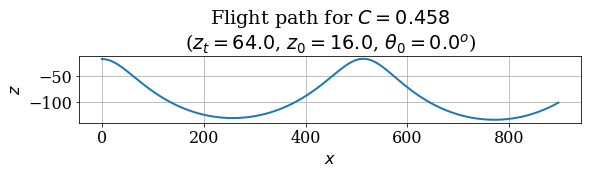

In [2]:
# Initial conditions: zt = 64.0, z0 = 16.0, theta0 = 0.0.
plot_flight_path(64.0, 16.0, 0.0)

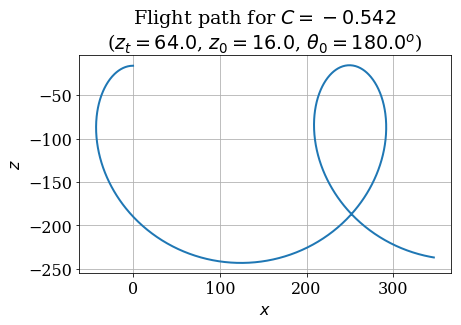

In [3]:
# Initial conditions: zt = 64.0, z0 = 16.0, theta0 = 180.0.
plot_flight_path(64.0, 16.0, 180.0)

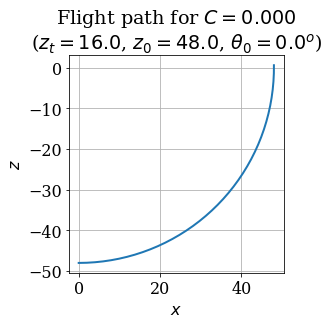

In [4]:
# Initial conditions: zt = 16.0, z0 = 48.0, theta0 = 0.0.
plot_flight_path(16.0, 48.0, 0.0)

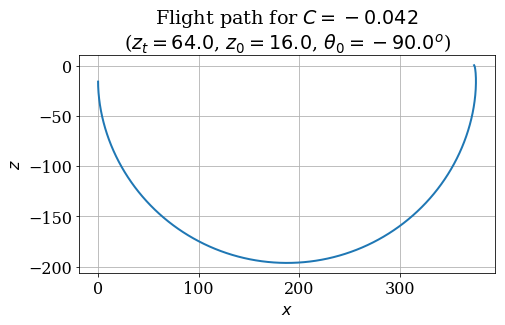

In [5]:
plot_flight_path(64.0, 16.0, -90.0)

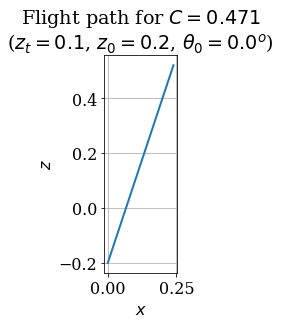

In [6]:
plot_flight_path(0.1,0.2,0)

In [7]:
# Create the time grid.
T = 100.0  # length of the time-interval
dt = 0.02  # time-step size
N = int(T / dt) + 1  # number of time steps
#t = np.linspace(0.0, T, num=N)  # time grid
t = np.arange(0,T,T/N)

In [8]:
# Set the initial conditions.
z0 = 100.0  # altitude
b0 = 10.0  # upward velocity resulting from gust
zt = 100.0  # trim altitude
g = 9.81  # acceleration due to gravity

# Set the initial value of the numerical solution.
u = np.array([z0, b0])

# Create an array to store the elevation value at each time step.
z = np.zeros(N)
z[0] = z0

In [9]:
# Temporal integration using Euler's method.
for n in range(1, N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

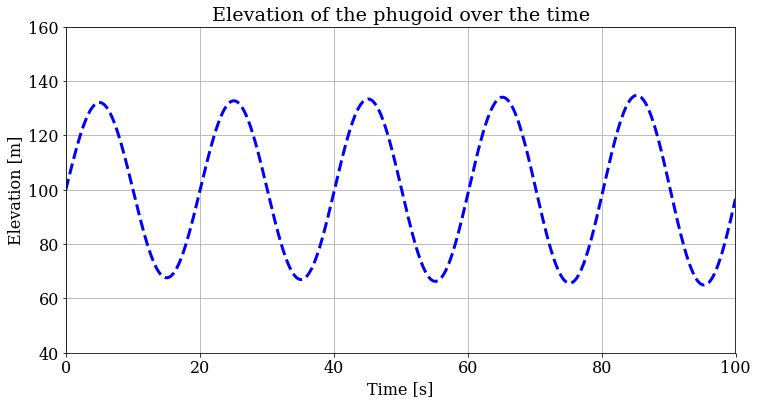

In [10]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

# Plot the solution of the elevation.
plt.figure(figsize=(12.0, 6.0))  # set the size of the figure
plt.title('Elevation of the phugoid over the time')  # set the title
plt.xlabel('Time [s]')  # set the x-axis label
plt.ylabel('Elevation [m]')  # set the y-axis label
plt.xlim(t[0], t[-1])  # set the x-axis limits
plt.ylim(40.0, 160.0)  # set the y-axis limits
plt.grid()  # set a background grid to improve readability
plt.plot(t, z, color='b', linestyle='--', linewidth=3);

In [11]:
z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
           (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)

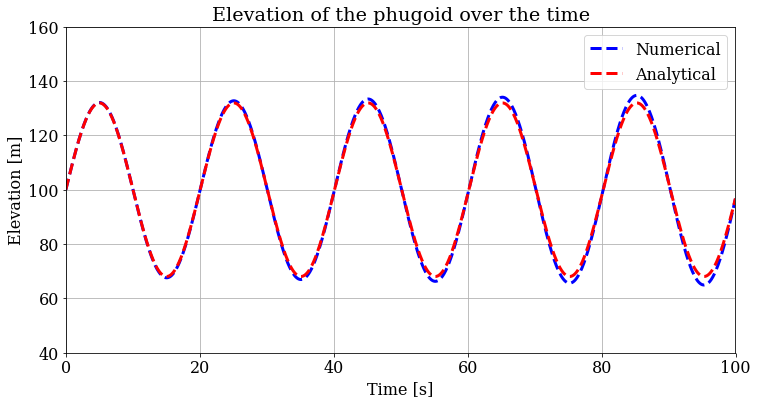

In [12]:
# Plot the numerical solution and the exact solution.
plt.figure(figsize=(12.0, 6.0))  # set the size of the figure
plt.title('Elevation of the phugoid over the time')  # set the title
plt.xlabel('Time [s]')  # set the x-axis label
plt.ylabel('Elevation [m]')  # set the y-axis label
plt.xlim(t[0], t[-1])  # set the x-axis limits
plt.ylim(40.0, 160.0)  # set the y-axis limits
plt.grid()  # set a background grid to improve readability
plt.plot(t, z, label='Numerical',
            color='b', linestyle='--', linewidth=3)
plt.plot(t, z_exact, label='Analytical',
            color='r', linestyle='--', linewidth=3)
plt.legend();  # set the legend

In [13]:
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

# Create an empty list that will contain the solution of each grid.
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    t = np.linspace(0.0, T, num=N)  # time grid
    # Set the initial conditions.
    u = np.array([z0, b0])
    z = np.empty_like(t)
    z[0] = z0
    # Temporal integration using Euler's method.
    for n in range(1, N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  # store the elevation at time-step n+1
    z_values.append(z)  # store the elevation over the time

In [14]:
def l1_error(z, z_exact, dt):
    """
    Computes and returns the error
    (between the numerical and exact solutions)
    in the L1 norm.
    
    Parameters
    ----------
    z : numpy.ndarray
        The numerical solution as an array of floats.
    z_exact : numpy.ndarray
        The analytical solution as an array of floats.
    dt : float
        The time-step size.
        
    Returns
    -------
    error: float
        L1-norm of the error with respect to the exact solution.
    """
    error = dt * np.sum(numpy.abs(z - z_exact))
    return error

In [15]:
a = np.array([1, 2, 3])
b = np.array([4, 4, 4])

b - a

array([3, 2, 1])

In [16]:
# Create an empty list to store the errors on each time grid.
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = np.linspace(0.0, T, num=N)  # time grid
    # Compute the exact solution.
    z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    # Calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))

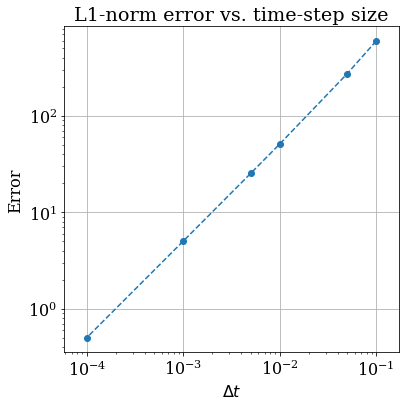

In [17]:
# Plot the error versus the time-step size.
plt.figure(figsize=(6.0, 6.0))
plt.title('L1-norm error vs. time-step size')  # set the title
plt.xlabel('$\Delta t$')  # set the x-axis label
plt.ylabel('Error')  # set the y-axis label
plt.grid()
plt.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
plt.axis('equal');  # make axes scale equally